In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


# Load the dataset
spotify_data = pd.read_csv('/Users/abhishekshah/Desktop/spotify PCA/spotify.csv')

# Display the first few rows of the dataframe
spotify_data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:

# Selecting only numerical columns for PCA
numerical_features = spotify_data[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                                   'tempo', 'duration_ms']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Performing PCA
pca = PCA()
pca.fit(scaled_features)

# Getting the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Creating a DataFrame to see the explained variance by each component
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance': explained_variance_ratio
})

explained_variance_df, scaled_features.shape


(   Principal Component  Explained Variance
 0                  PC1            0.165970
 1                  PC2            0.123262
 2                  PC3            0.094108
 3                  PC4            0.089350
 4                  PC5            0.080758
 5                  PC6            0.076195
 6                  PC7            0.074654
 7                  PC8            0.065694
 8                  PC9            0.062103
 9                 PC10            0.062034
 10                PC11            0.047405
 11                PC12            0.041534
 12                PC13            0.016933,
 (32833, 13))

The PCA has resulted in 13 principal components, as we had 13 original features. Here's how much variance each of the principal components explains:

PC1: 16.60%
PC2: 12.33%
PC3: 9.41%
PC4: 8.94%
PC5: 8.08%
PC6: 7.62%
PC7: 7.47%
PC8: 6.57%
PC9: 6.21%
PC10: 6.20%
PC11: 4.74%
PC12: 4.15%
PC13: 1.69%

To figure out the right number of principal components to keep, I look for where the line in the scree plot starts to flatten out, which is often called the "elbow." This helps me understand at what point additional components don't add much value in terms of explaining the variance. My goal is to keep enough components to capture a good chunk of the variance without keeping unnecessary ones.

I also use a cumulative explained variance plot. This shows the total variance captured as I add more components. By looking at this plot, I can see how many components might be enough. I'm going to make both a scree plot and a cumulative variance plot to aid in this decision-making process.

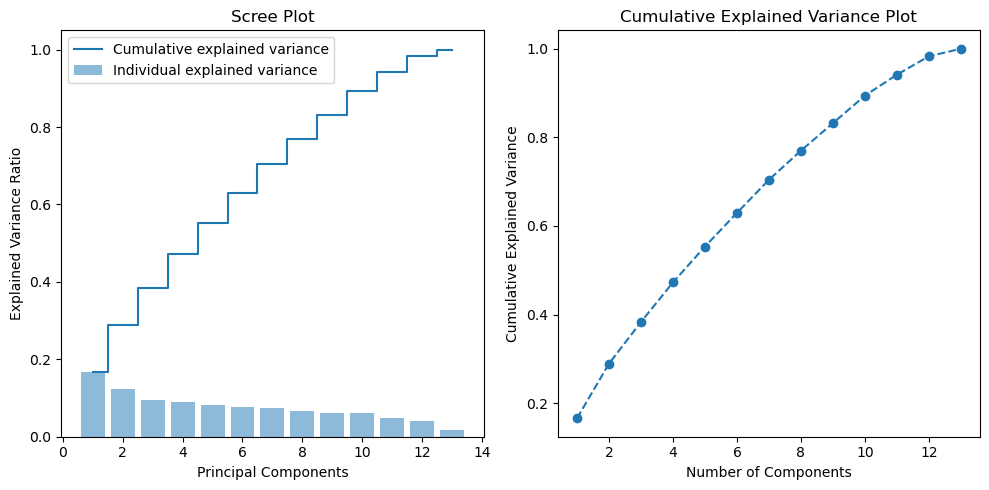

In [ ]:
import matplotlib.pyplot as plt

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Create a scree plot for the explained variance
plt.figure(figsize=(10, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Scree Plot')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')

plt.tight_layout()
plt.show()


Looking at the scree plot to my left, it shows me the proportion of variance each principal component accounts for, while the cumulative explained variance plot to my right accumulates these individual contributions to give me a running total. It's from this cumulative plot that I gather several key insights. Notably, when I reach the fourth or fifth component, the increase in explained variance starts to taper off, suggesting that subsequent components are not adding as much in terms of new information. By the time I include five components, they collectively explain about 55% of the variance within the dataset. Should I choose to include up to ten components, this coverage rises to over 80%, giving a much fuller picture of the dataset's structure.

The number of components I opt to retain hinges on the specific context and goals of my analysis. Striking a balance between simplifying the dataset and preserving its intrinsic information is crucial. Typically, I would aim to capture a substantial proportion of the variance, which often falls in the range of 80-90%.

Moving forward, my next step is to investigate the composition of the initial few principal components. This examination will clarify which features are most dominant in each component, thereby shedding light on the underlying patterns within the dataset. It's a process that promises to provide valuable insights, revealing the multifaceted nature of the data that might not be immediately apparent from considering the features in isolation.

The composition of the first five principal components (PC1 to PC5) are below: 

PC1: Shows strong negative loadings on energy and loudness, and strong positive loading on acousticness. This suggests that this component might represent a contrast between loud and energetic tracks versus more acoustic tracks.

PC2: Has strong negative loadings on danceability and valence, and a positive loading on instrumentalness. It seems to capture elements of tracks that are less danceable and less happy, but more likely to have instrumental content.

PC3: Is heavily influenced by track_popularity and mode, with high positive loadings on key and instrumentalness. This might be capturing a mix of tracks' musical keys, their popularity, and their instrumental aspects.

PC4: Also shows strong loadings on key and mode, but with a negative loading on valence and positive on speechiness. This component might be capturing tracks that are more speech-like and in a minor mode, which can be less happy sounding.

PC5: Is dominated by speechiness and liveness, suggesting it captures tracks that are likely to have spoken words and a live audience presence.

These components combine the original features in ways that can highlight differences between tracks that aren't obvious when looking at any one feature alone.

In [ ]:
# analyze the loadings of PC1 in more detail to see which features are the most influential.
# Selecting only numerical columns for PCA
numerical_features = spotify_data[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                                   'tempo', 'duration_ms']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Performing PCA
pca = PCA()
pca.fit(scaled_features)

# Extract PCA components again
pca_components_df = pd.DataFrame(
    pca.components_,
    columns=numerical_features.columns,
    index=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
)

# Extract the loadings for PC1
pc1_loadings = pca_components_df.loc['PC1'].sort_values(ascending=False)

# Display the features with the highest absolute values in PC1
pc1_loadings_high = pc1_loadings[abs(pc1_loadings).argsort()[::-1]]  # Sort by absolute value in descending order

pc1_loadings_high 


energy             -0.616577
loudness           -0.547194
acousticness        0.491826
tempo              -0.178768
liveness           -0.164862
valence            -0.099299
track_popularity    0.067946
instrumentalness    0.052167
danceability        0.044108
mode                0.012715
duration_ms         0.005605
key                -0.005107
speechiness         0.004427
Name: PC1, dtype: float64

After the analysis, I have the loadings for PC1. These loadings show how much each feature contributes to PC1. Here are the features with the highest absolute loadings in PC1:
A) Energy has a strong negative loading of -0.616577. This means that PC1 and energy are inversely related.
B) Loudness also has a strong negative loading of -0.547194. This indicates that quieter tracks tend to have higher scores on this component.
C) Acousticness has a positive loading of 0.491826. This suggests that tracks with more acoustic elements score higher on PC1.

These loadings suggest that PC1 represents a spectrum, ranging from energetic and loud music on one end to calm and acoustic music on the other.